<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPrepBlipGlitches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install --target=$nb_path gwpy --upgrade

  Using cached https://files.pythonhosted.org/packages/2d/e6/14f8cefc3ebd73e062323ed94ecc2ea943b3ab69137b2b9fc9df4087a9bc/gwpy-0.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d6/9e/616124723b7a8f2a5399f9288b056bb31f37222b0b7cae46f6bafaa42154/gwdatafind-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/46/ae6773894f7eacf53308086287897ec568eac9768918d913d5b9d366c5db/numpy-1.17.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6d/ff/67426ce11f9f3432e020f5d5ef796e1d8e1c2a76b555c8705177f4347f99/gwosc-0.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df/ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packag

In [0]:
import gwpy
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from gwpy.timeseries import TimeSeries
data_with_glitch = TimeSeries.fetch_open_data('L1', 1127711090-50, 1127711090+50)
data_no_glitch = TimeSeries.fetch_open_data('L1', 1127711090-101, 1127711090-1)

data_Q_Transglitch = TimeSeries.fetch_open_data('L1', 1127711090-2, 1127711090+2)
data_Q_Transnoise = TimeSeries.fetch_open_data('L1', 1127711090-5, 1127711090-1)

white_no_glitch = data_no_glitch.whiten(2, 1)
white_glitch = data_with_glitch.whiten(2, 1)

**Analysis with LIGO data for Glitch Recognition using Q-Transforms**

Text(0.5, 1.0, 'Timeseries outside Glitch GPS for Q-Trans')

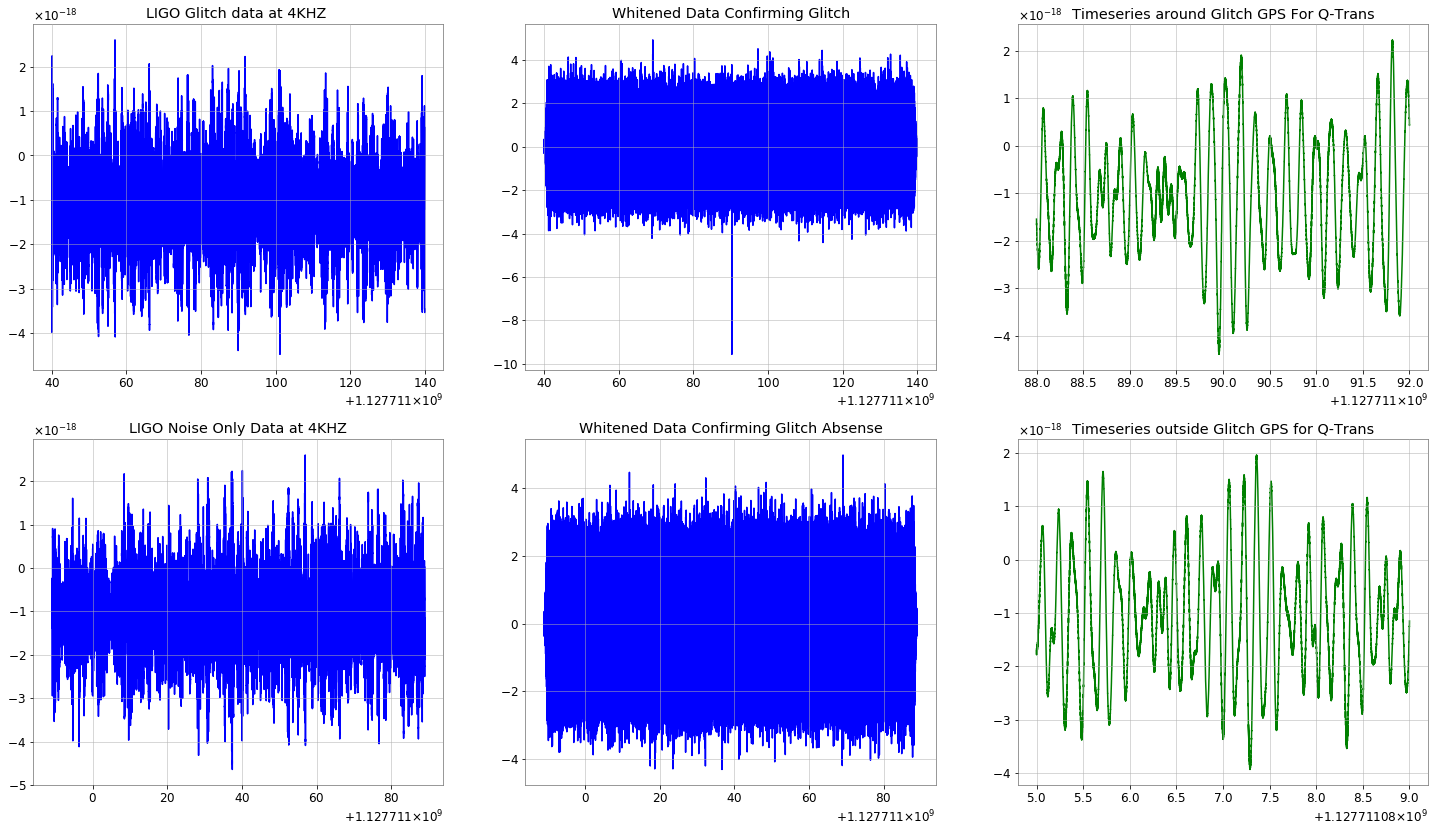

In [8]:
t_value_with_glitch = np.linspace(1127711090-50, 1127711090+50, num = np.array(data_with_glitch).size)
t_value_no_glitch = np.linspace(1127711090-101, 1127711090-1, num = np.array(data_no_glitch).size)

t_value_with_glitch_Q = np.linspace(1127711090-2, 1127711090+2, num = np.array(data_Q_Transglitch).size)
t_value_no_glitch_Q = np.linspace(1127711090-5, 1127711090-1, num = np.array(data_Q_Transnoise).size)

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
f.set_size_inches(25, 14)
ax1.plot(t_value_with_glitch, data_with_glitch, 'b')
ax2.plot(t_value_with_glitch, white_glitch, 'b')
ax3.plot(t_value_with_glitch_Q, data_Q_Transglitch, 'g')
ax1.set_title('LIGO Glitch data at 4KHZ ')
ax2.set_title('Whitened Data Confirming Glitch')
ax3.set_title('Timeseries around Glitch GPS For Q-Trans')
ax4.plot(t_value_no_glitch, data_no_glitch, 'b')
ax5.plot(t_value_no_glitch, white_no_glitch, 'b')
ax6.plot(t_value_no_glitch_Q, data_Q_Transnoise, 'g')
ax4.set_title('LIGO Noise Only Data at 4KHZ')
ax5.set_title('Whitened Data Confirming Glitch Absense')
ax6.set_title('Timeseries outside Glitch GPS for Q-Trans')

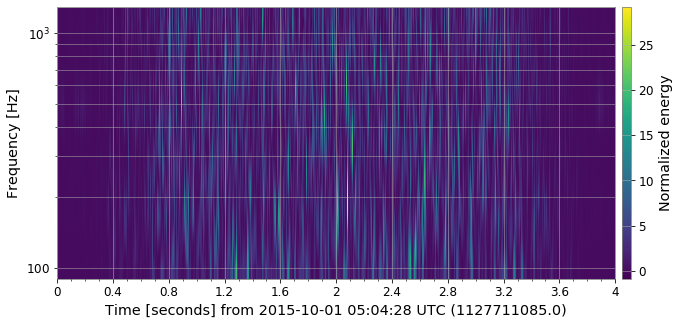

In [9]:
qtrans_noise = data_Q_Transnoise.q_transform()
plot = qtrans_noise.imshow(figsize=[10, 5])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
#ax.set_epoch(1127711090)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()

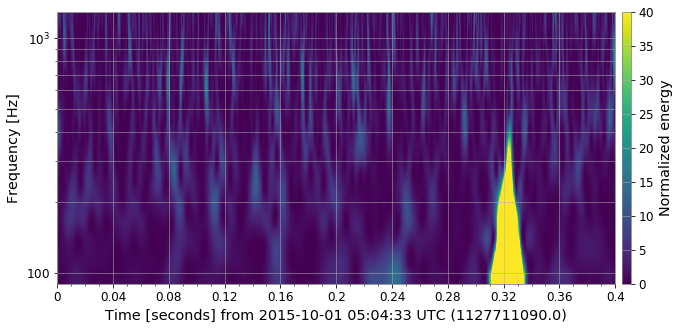

In [10]:
qtrans_glitch = data_Q_Transglitch.q_transform(outseg=(1127711090, 1127711090.4))
plot = qtrans_glitch.imshow(figsize=[10, 5])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_epoch(1127711090)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 40])
plot.show()

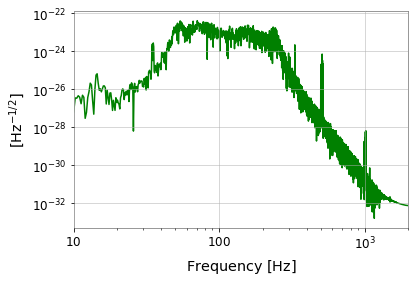

In [0]:
data_asd = datafilt.asd(4, 2)
plot = data_asd.plot(color='g')
ax = plot.gca()
ax.set_xlim(10, 2000)
#ax.set_ylim(5e-24, 1e-21)
plot.show()

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, data.sample_rate)

notches = [filter_design.notch(line, data.sample_rate) for
           line in (60, 120, 180)]

In [0]:
zpk = filter_design.concatenate_zpks(bp, *notches)
datafilt = data.filter(zpk, filtfilt=True)

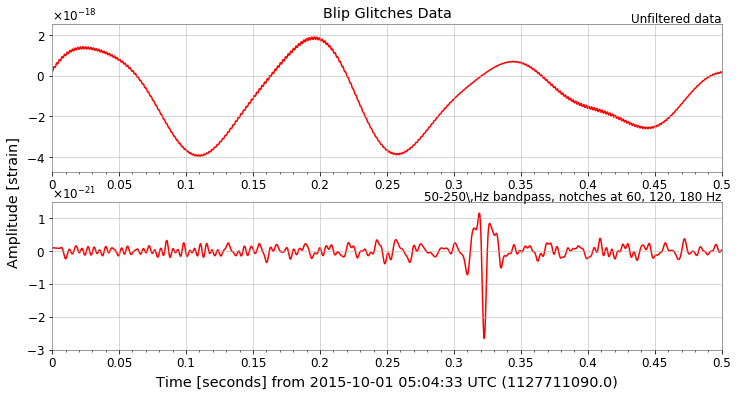

In [0]:
from gwpy.plot import Plot
plot = Plot(data, datafilt, figsize=[12, 6], separate=True, sharex=True, color='r')
ax1, ax2 = plot.axes
ax1.set_title('Blip Glitches Data')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.set_xlim(1127711090, 1127711090.5)
ax2.set_ylim(-3e-21, 1.5e-21)
ax2.text(1.0, 1.01, '50-250\,Hz bandpass, notches at 60, 120, 180 Hz', transform=ax2.transAxes, ha='right')
plot.show()

In [0]:
import pandas as pd
raw_data = pd.read_csv("/content/gdrive/My Drive/gspy_blip_o1.csv")

In [0]:
for i in range(len(raw_data)):
  raw_data['GPStime'][i]

In [160]:
raw_data_modified

1128331858.221